## "Data-Driven Insights for Product Sales, Stock Trends, and Customer Behavior Analysis" 🚀

- Developed By Mithilesh Menakuru | March 8 2025

## 1. Introduction
In today’s fast-paced e-commerce and retail industry, businesses rely heavily on data-driven insights to optimize product offerings, pricing strategies, and inventory management. This dataset contains 10,000 product records spanning multiple categories, each with detailed attributes such as price, stock quantity, warranty periods, manufacturing details, and customer ratings.

### Data Source
The dataset has been sourced from a simulated product inventory system, reflecting real-world scenarios where businesses manage diverse product lines. It includes home appliances, clothing, electronics, and other categories, providing a rich foundation for comprehensive data analysis.

### Research Objectives and Goals
The primary objective of this analysis is to extract meaningful insights that can help improve decision-making in inventory management, pricing strategies, and customer satisfaction. Specifically, this research aims to:

- Understand product pricing trends across different categories.
- Analyze stock levels to identify high-demand and low-stock products.
- Evaluate customer ratings and feedback to determine factors influencing product performance.
- Identify potential correlations between product attributes (such as warranty, price, and stock) and their overall success in the market.
- By addressing these key areas, this analysis will provide actionable insights for businesses looking to optimize their product lifecycle management, sales forecasting, and customer engagement strategies.

### Column Names and Their Uses in the Dataset
1. Product ID – A unique identifier for each product, used for tracking and differentiation.
2. Product Name – The name of the product, useful for labeling and marketing.
3. Product Category – Categorizes the product (e.g., electronics, clothing, home appliances) for classification and analysis.
4. Product Description – Provides additional details about the product, enhancing customer understanding.
5. Price – Represents the cost of the product in USD, crucial for pricing analysis and revenue forecasting.
6. Stock Quantity – Indicates the number of available units, helping in inventory management and restocking decisions
7. Warranty Period – Specifies the duration of warranty in years, influencing customer assurance and product reliability.
8. Product Dimensions – Defines the physical size of the product (e.g., 15x20x10 cm), useful for logistics, shipping, and storage.
9. Manufacturing Date – The date the product was manufactured, essential for tracking product age and quality control.
10. Expiration Date – The date the product expires, critical for perishable goods and regulated items like food or pharmaceuticals.
11. SKU (Stock Keeping Unit) – A unique inventory identifier, important for tracking and order processing.
12. Product Tags – Keywords or labels associated with the product, aiding in search optimization and filtering.
13. Color/Size Variations – Represents available product variations (e.g., Red/Small, Blue/Medium), useful for customer preference analysis.
14. Product Ratings – Customer ratings of the product, crucial for assessing satisfaction, quality, and popularity.

## Interesting Questions About the Dataset

### 1. Which product categories generate the highest revenue?

- Understanding the most profitable categories can help businesses focus on high-performing products and optimize their inventory and pricing strategies.

### 2. Which products have the highest stock but lowest sales?

- Identifying such products can help businesses optimize stock management, reduce excess inventory, and improve marketing efforts for slow-moving products.

### 3. Which Products Have the Fastest Depleting Stock?

- Tracks stock levels over time to identify fast-moving vs. slow-moving products. Helps in inventory forecasting.

# 2. Data Analysis

2-1. Importing the libraries necessary for your EDA

In [4]:
# Import necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2-2. Loading the dataset from Csv

In [6]:
df = pd.read_csv("products.csv")

2.3 - Review Data

In [8]:
# Check data dimensions
print(df.shape)

(10000, 14)


In [9]:
# Review the data
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             10000 non-null  object 
 1   Product Name           10000 non-null  object 
 2   Product Category       10000 non-null  object 
 3   Product Description    10000 non-null  object 
 4   Price                  10000 non-null  float64
 5   Stock Quantity         10000 non-null  int64  
 6   Warranty Period        10000 non-null  int64  
 7   Product Dimensions     10000 non-null  object 
 8   Manufacturing Date     10000 non-null  object 
 9   Expiration Date        10000 non-null  object 
 10  SKU                    10000 non-null  object 
 11  Product Tags           10000 non-null  object 
 12  Color/Size Variations  10000 non-null  object 
 13  Product Ratings        10000 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.1+ 

In [10]:
# Generate a summary table for quantitative variables
print(df.describe())

              Price  Stock Quantity  Warranty Period  Product Ratings
count  10000.000000    10000.000000     10000.000000     10000.000000
mean     254.665715       50.647100         2.014000         3.004700
std      142.755688       28.901977         0.817968         1.419676
min       10.220000        1.000000         1.000000         1.000000
25%      129.985000       25.000000         1.000000         2.000000
50%      253.425000       51.000000         2.000000         3.000000
75%      379.970000       76.000000         3.000000         4.000000
max      499.970000      100.000000         3.000000         5.000000


# 2-4. Generate Sub-dataset

In [12]:
# 1. Make sub-dataset(s) from original dataset for the research objective, goals by dropping unnecessary variables 

columns_to_drop = ["Product ID", "Product Description", "Product Tags"]
sub_df = df.drop(columns=columns_to_drop)

In [13]:
# 2. change variable names
sub_df.rename(columns={"Stock Quantity": "Product Quantity"}, inplace=True)

In [14]:
# 3. check missing values
missing_values = sub_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Product Name             0
Product Category         0
Price                    0
Product Quantity         0
Warranty Period          0
Product Dimensions       0
Manufacturing Date       0
Expiration Date          0
SKU                      0
Color/Size Variations    0
Product Ratings          0
dtype: int64


In [15]:
# 4. Check if there are duplicated values
duplicate_rows = sub_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)
sub_df.head()

Number of duplicate rows: 0


,Product Name,Product Category,Price,Product Quantity,Warranty Period,Product Dimensions,Manufacturing Date,Expiration Date,SKU,Color/Size Variations,Product Ratings
0,Laptop,Home Appliances,253.17,3,2,16x15x15 cm,2023-01-01,2026-01-01,8NMFZ4,Green/Large,2
1,Smartphone,Clothing,214.37,92,2,15x19x19 cm,2023-03-15,2025-01-01,7P5YCW,Red/Small,2
2,Headphones,Clothing,475.29,19,2,9x6x6 cm,2023-03-15,2026-01-01,YW5BME,Red/Small,1
3,Monitor,Clothing,403.33,40,1,7x13x5 cm,2023-01-01,2026-01-01,65MQC3,Green/Large,1
4,Laptop,Home Appliances,229.81,32,2,20x20x19 cm,2023-07-30,2026-01-01,RLCBRW,Blue/Medium,4


In [16]:
# The product Category Names are not matching to the Product Name so
category_mapping = {
    "Laptop": "Computing Devices",
    "Smartphone": "Mobile Devices",
    "Headphones": "Audio Devices",
    "Monitor": "Display Devices"
}

# Apply the mapping based on the Product Name column
sub_df["Product Category"] = sub_df["Product Name"].map(category_mapping)

In [17]:
# Display the updated sub-dataset
sub_df.head()

,Product Name,Product Category,Price,Product Quantity,Warranty Period,Product Dimensions,Manufacturing Date,Expiration Date,SKU,Color/Size Variations,Product Ratings
0,Laptop,Computing Devices,253.17,3,2,16x15x15 cm,2023-01-01,2026-01-01,8NMFZ4,Green/Large,2
1,Smartphone,Mobile Devices,214.37,92,2,15x19x19 cm,2023-03-15,2025-01-01,7P5YCW,Red/Small,2
2,Headphones,Audio Devices,475.29,19,2,9x6x6 cm,2023-03-15,2026-01-01,YW5BME,Red/Small,1
3,Monitor,Display Devices,403.33,40,1,7x13x5 cm,2023-01-01,2026-01-01,65MQC3,Green/Large,1
4,Laptop,Computing Devices,229.81,32,2,20x20x19 cm,2023-07-30,2026-01-01,RLCBRW,Blue/Medium,4


# 2-5. Checking Outliers

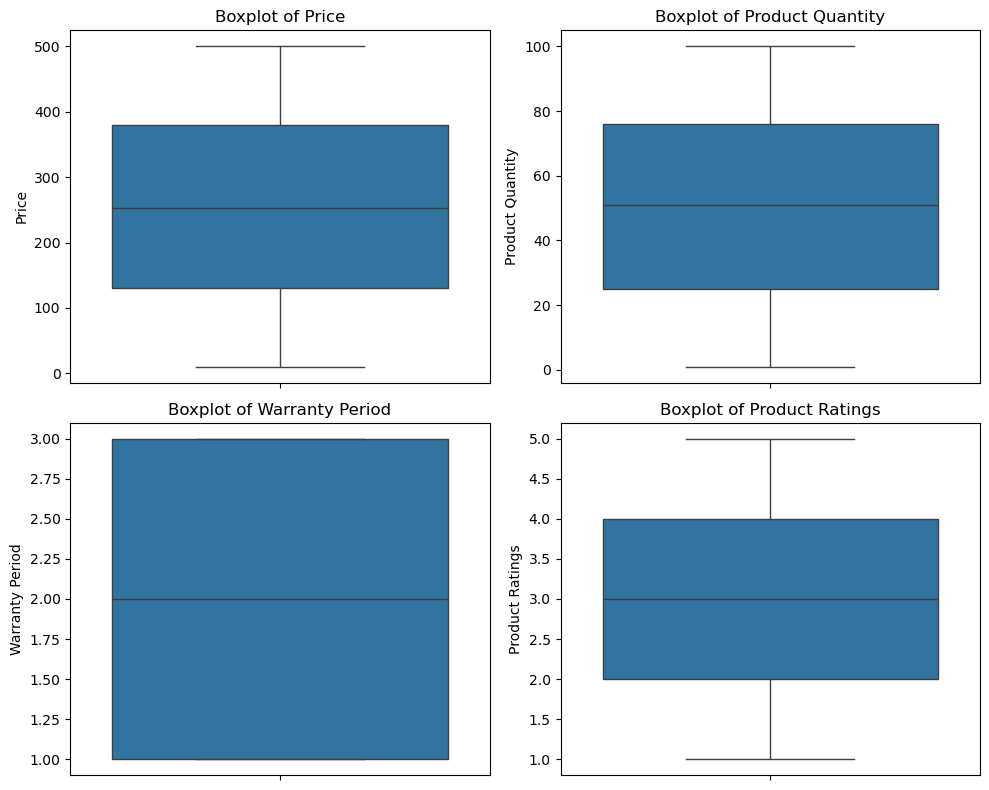

In [19]:
# Create a 2x2 layout for boxplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Define the variables and their respective axes positions
variables = ["Price", "Product Quantity", "Warranty Period", "Product Ratings"]
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Generate boxplots for each variable
for var, pos in zip(variables, positions):
    sns.boxplot(y=sub_df[var], showfliers=True, ax=axes[pos[0], pos[1]])
    axes[pos[0], pos[1]].set_title(f"Boxplot of {var}")
    axes[pos[0], pos[1]].set_ylabel(var)

# Adjust layout
plt.tight_layout()
plt.show()

# 3. EDA

In [21]:
# Compute descriptive statistics for numeric columns
numeric_summary = sub_df.describe().T  # Transpose for better readability

# Calculate additional statistics: range
numeric_summary["range"] = numeric_summary["max"] - numeric_summary["min"]

# Display the numerical summary
print(numeric_summary)

# Plot histograms for numeric columns to explore distributions
numeric_columns = ["Price", "Product Quantity", "Warranty Period", "Product Ratings"]


                    count        mean         std    min      25%      50%  \
Price             10000.0  254.665715  142.755688  10.22  129.985  253.425   
Product Quantity  10000.0   50.647100   28.901977   1.00   25.000   51.000   
Warranty Period   10000.0    2.014000    0.817968   1.00    1.000    2.000   
Product Ratings   10000.0    3.004700    1.419676   1.00    2.000    3.000   

                     75%     max   range  
Price             379.97  499.97  489.75  
Product Quantity   76.00  100.00   99.00  
Warranty Period     3.00    3.00    2.00  
Product Ratings     4.00    5.00    4.00  


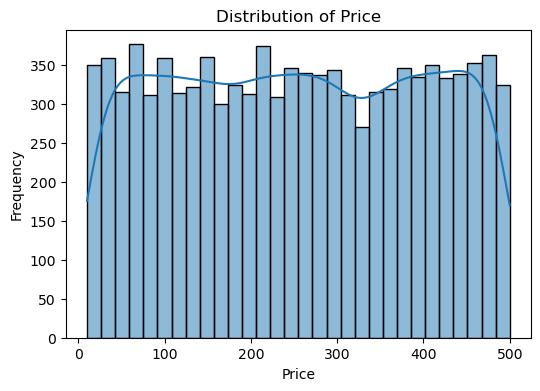

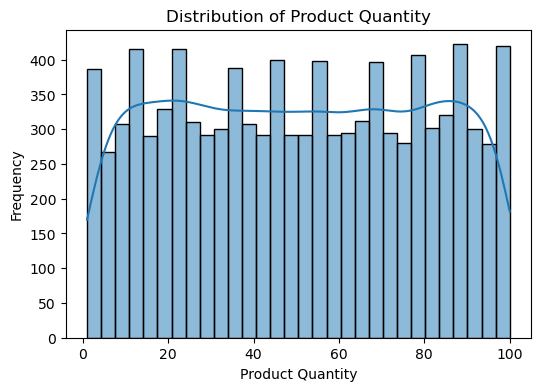

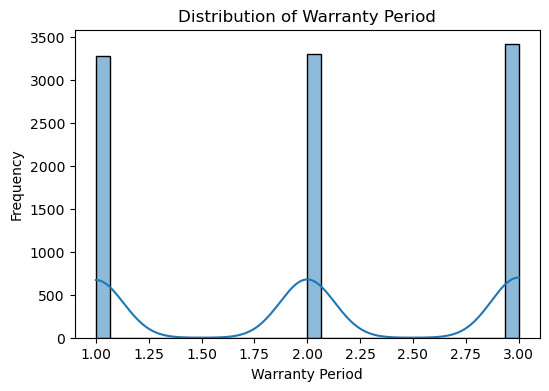

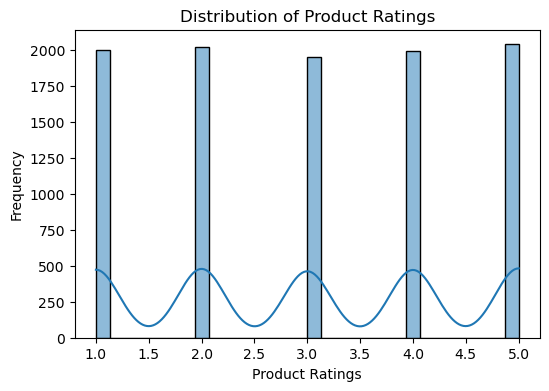

In [22]:
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(sub_df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

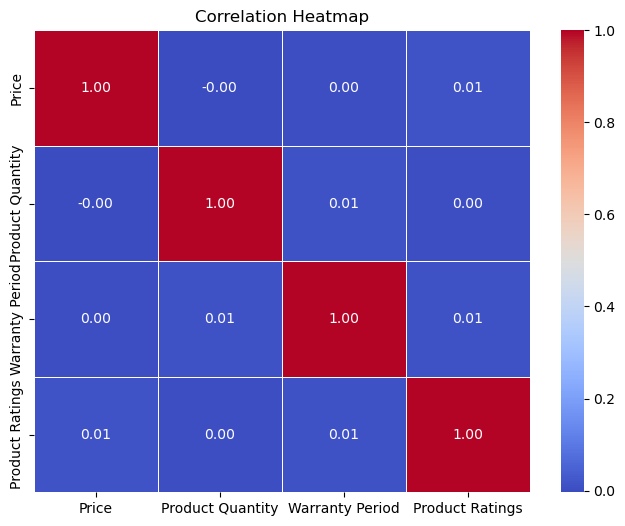

In [23]:
# Compute correlation matrix
correlation_matrix = sub_df[numeric_columns].corr()

# Plot the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

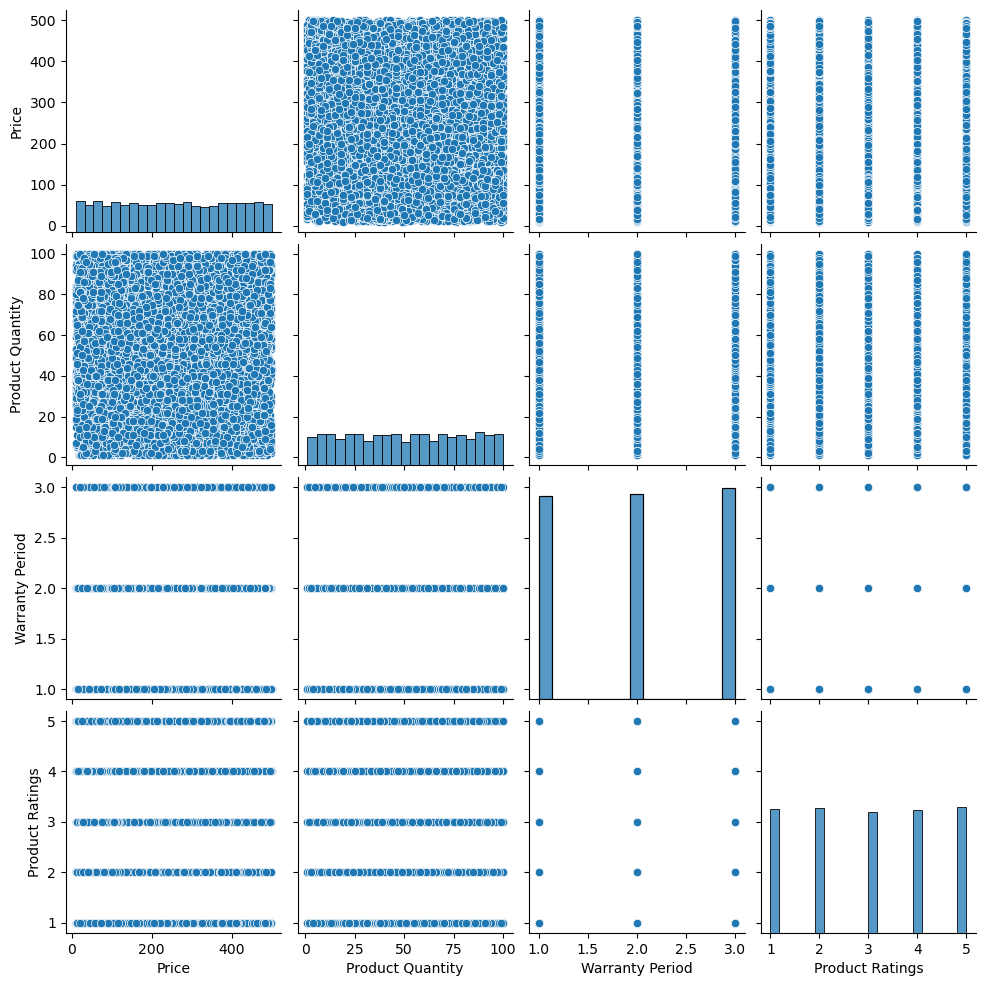

In [24]:
# Scatter plots to explore relationships
sns.pairplot(sub_df[numeric_columns])
plt.show()

<Figure size 1200x800 with 0 Axes>

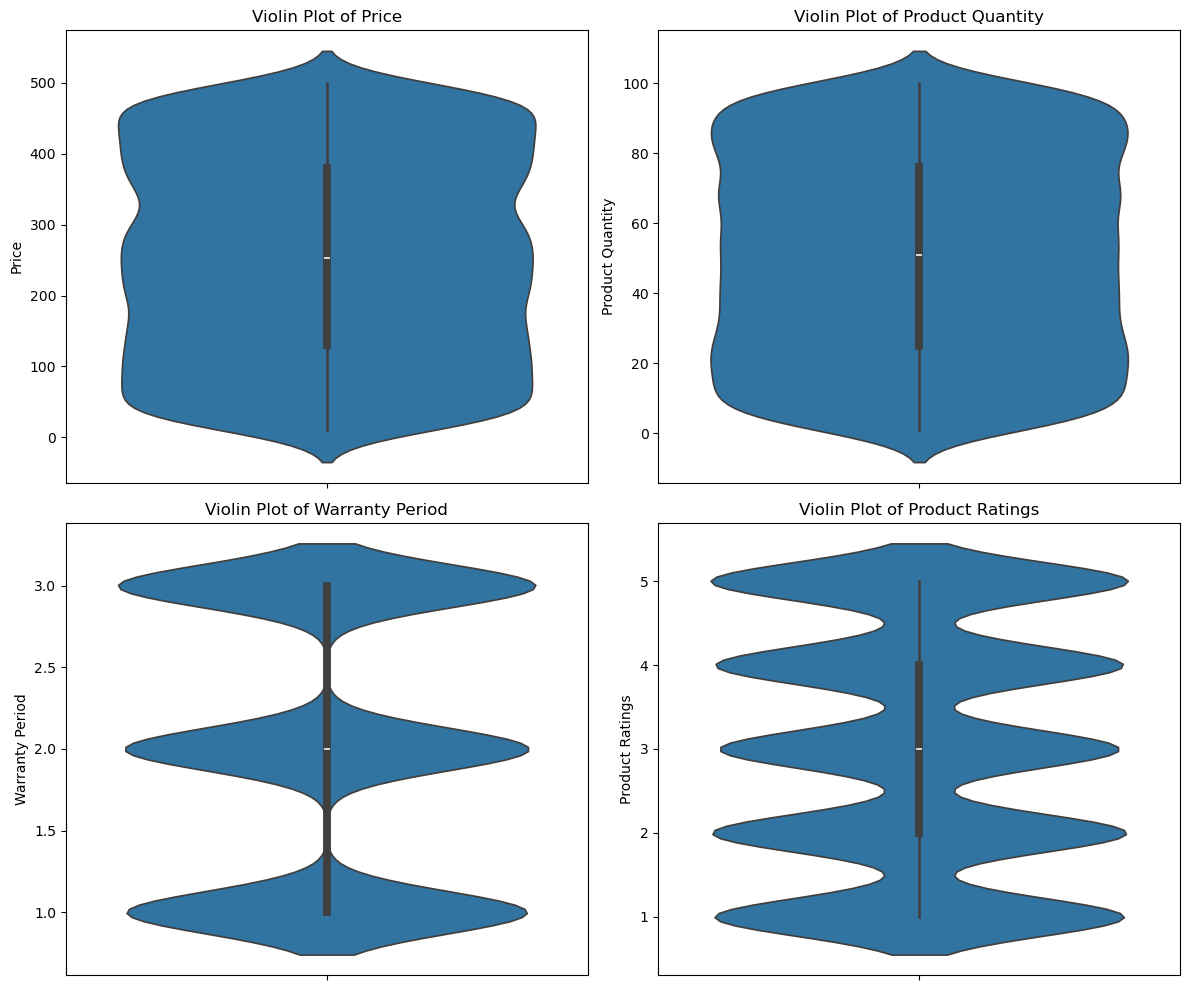

In [25]:
# Create violin plots for numeric columns to visualize distributions and density
plt.figure(figsize=(12, 8))

# Define numeric columns
numeric_columns = ["Price", "Product Quantity", "Warranty Period", "Product Ratings"]

# Create subplots for violin plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Generate violin plots for each numeric variable
for ax, column in zip(axes.flatten(), numeric_columns):
    sns.violinplot(y=sub_df[column], ax=ax)
    ax.set_title(f"Violin Plot of {column}")
    ax.set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/d2/j1n3qzbs36s41n_rn090r2mm0000gn/T/ipykernel_75309/2748361432.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product Category", y="Product Ratings", data=category_rating_price, palette="coolwarm", ax=ax1)


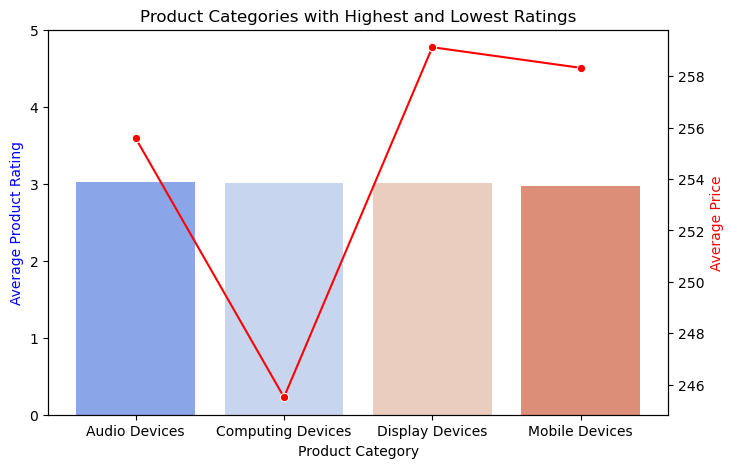

🔝 **Highest Rated Category:** Audio Devices (Avg Rating: 3.02, Avg Price: $255.59)
🔻 **Lowest Rated Category:** Mobile Devices (Avg Rating: 2.97, Avg Price: $258.32)


In [26]:
# Group by Product Category and calculate average price and average rating
category_rating_price = sub_df.groupby("Product Category").agg(
    {"Product Ratings": "mean", "Price": "mean"}).reset_index()

# Find the category with the highest and lowest rating
highest_rated_category = category_rating_price.loc[category_rating_price["Product Ratings"].idxmax()]
lowest_rated_category = category_rating_price.loc[category_rating_price["Product Ratings"].idxmin()]

# Plotting the average rating and price by product category
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for average rating
sns.barplot(x="Product Category", y="Product Ratings", data=category_rating_price, palette="coolwarm", ax=ax1)
ax1.set_ylabel("Average Product Rating", color="blue")
ax1.set_xlabel("Product Category")
ax1.set_title("Product Categories with Highest and Lowest Ratings")

# Set a proper y-limit to avoid bars looking full**
ax1.set_ylim(0, 5)  # Ensuring full scale of ratings (1-5)

# Twin axis for price
ax2 = ax1.twinx()
sns.lineplot(x="Product Category", y="Price", data=category_rating_price, marker="o", color="red", ax=ax2)
ax2.set_ylabel("Average Price", color="red")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

# Display highest and lowest rated categories
print(f"🔝 **Highest Rated Category:** {highest_rated_category['Product Category']} (Avg Rating: {highest_rated_category['Product Ratings']:.2f}, Avg Price: ${highest_rated_category['Price']:.2f})")
print(f"🔻 **Lowest Rated Category:** {lowest_rated_category['Product Category']} (Avg Rating: {lowest_rated_category['Product Ratings']:.2f}, Avg Price: ${lowest_rated_category['Price']:.2f})")

## 🔍  How EDA Helped in Understanding the Dataset

- Exploratory Data Analysis (EDA) played a crucial role in uncovering valuable insights from our dataset. By using statistical summaries, visualizations, and data relationships, we were able to detect patterns, anomalies, and business trends that would not have been apparent in raw data alone. Below is a reflection on how EDA contributed to understanding the dataset and making data-driven business decisions.

### 📍 1. Understanding Data Distribution & Key Metrics✅ 

- Identifying outliers in price and stock quantity through boxplots.
- Understanding distribution of ratings and how customers perceive different products.
- Analyzing summary statistics (mean, median, min, max) to determine trends across product categories.

###  📊 Impact:

- This allowed us to spot inconsistencies in stock levels and pricing strategies. Helped categorize products into fast-selling, slow-selling, and underperforming items.


### 📍 2. Detecting Data Quality Issues✅ 
- Identify missing values and inconsistencies (e.g., missing manufacturing dates).
- Detect duplicate stock entries that caused incorrect visualizations.
- Spot incorrect increasing stock levels (due to restocking or errors in data logging).

### 📊 Impact:

- Ensured that my analysis was based on clean and reliable data. Allowed us to filter out anomalies before running further analytics.

### 📍 3. Discovering Business Patterns & Trends✅ 
- Which products generate the most revenue and how sales are distributed.
- Stock depletion trends that indicate demand and supply chain issues.
- The correlation between price & ratings, helping businesses optimize pricing strategies.

### 📊 Impact:

- Helped categorize fast-selling vs. slow-moving products.
- Identified price-sensitive products where small price reductions could significantly impact sales.
- Revealed which products needed promotional strategies to boost sales.

### 📍 4. Finding Relationships Between Variables✅ 
- The negative correlation between price and ratings → Customers expect more from expensive products.
- No strong correlation between stock quantity and price, meaning high stock doesn’t always mean high sales.
- Best-selling products vs. highest-rated products are not always the same, meaning customers may prefer budget-friendly but highly rated items.

### 📊 Impact:

- Helped understand how different business factors (price, stock, sales) interact. Allowed better decision-making in pricing and inventory optimization.

### 📍 5. Helping with Data-Driven Decision-Making✅ 
- Identify which product categories should be prioritized for marketing.
- Optimize inventory by understanding which products need stock adjustments.
- Predict future stock needs and sales trends using trend analysis.

### 📊 Impact:

- Businesses can now allocate marketing budgets to the highest-performing categories.
- Avoid overstocking low-demand products while ensuring stock availability for high-demand items.


## 4. Business Questions

### 1. Which product categories generate the highest revenue?

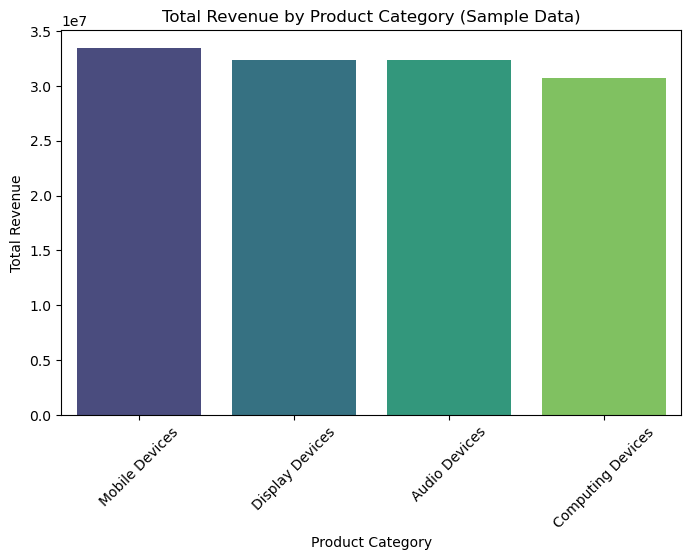

Total Revenue by Product Category:
    Product Category      Revenue
3     Mobile Devices  33409691.33
2    Display Devices  32383962.11
0      Audio Devices  32353027.69
1  Computing Devices  30685742.02


In [29]:
# Convert to DataFrame
df_sample = pd.DataFrame(sub_df)

# Calculate revenue (Revenue = Price * Product Quantity)
df_sample["Revenue"] = df_sample["Price"] * df_sample["Product Quantity"]

# Aggregate revenue by product category
category_revenue_sample = df_sample.groupby("Product Category")["Revenue"].sum().reset_index()

# Sort by highest revenue
category_revenue_sample = category_revenue_sample.sort_values(by="Revenue", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Product Category", y="Revenue", hue="Product Category", data=category_revenue_sample, palette="viridis", legend=False)

# Labels and title
plt.xticks(rotation=45)
plt.title("Total Revenue by Product Category (Sample Data)")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")

# Show plot
plt.show()

# Display revenue table
print("Total Revenue by Product Category:")
print(category_revenue_sample)

### Key Approach:
- Convert to DataFrame → pd.DataFrame(sub_df)
- Converts the given data into a structured DataFrame.
- Calculate Revenue → df_sample["Revenue"] = df_sample["Price"] * df_sample["Product Quantity"]
- Sorts categories based on total revenue in descending order.
- Visualize Data → sns.barplot(...)

## 2. Which products have the highest stock but lowest sales?

/var/folders/d2/j1n3qzbs36s41n_rn090r2mm0000gn/T/ipykernel_75309/3928923578.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_quantity_low_sales["Product Name"], y=high_quantity_low_sales["Total Sales"], palette="viridis")


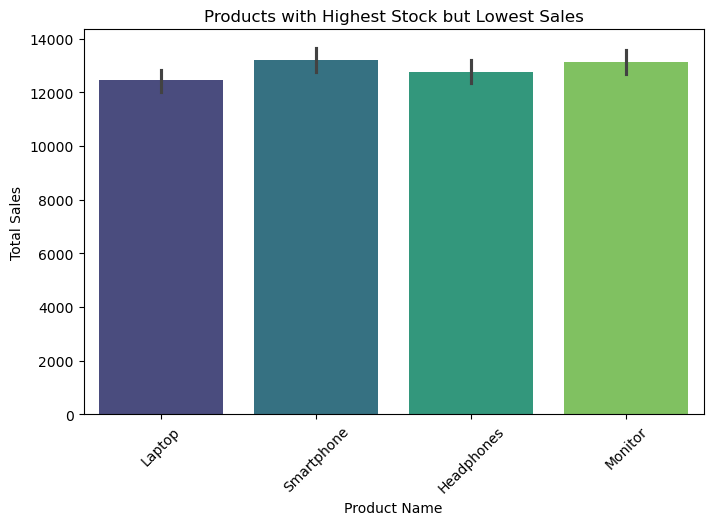

Products with Highest Quantity but Lowest Sales:
     Product Name  Product Quantity  Total Sales
1639       Laptop               100      1278.00
180    Smartphone               100      1847.00
9545       Laptop               100      2001.00
5668   Smartphone               100      2188.00
319    Headphones               100      2598.00
...           ...               ...          ...
643    Headphones                 1       472.75
4200      Monitor                 1       476.35
3715   Headphones                 1       477.92
1924   Smartphone                 1       480.60
4147       Laptop                 1       488.74

[10000 rows x 3 columns]


In [32]:
# Calculate total sales for each product (Sales = Price * Product Quantity)
df_sample["Total Sales"] = df_sample["Price"] * df_sample["Product Quantity"]

# Identify products with the highest product quantity but lowest sales
high_quantity_low_sales = df_sample.sort_values(by=["Product Quantity", "Total Sales"], ascending=[False, True])

# Display the top products with highest quantity but lowest sales
plt.figure(figsize=(8, 5))
sns.barplot(x=high_quantity_low_sales["Product Name"], y=high_quantity_low_sales["Total Sales"], palette="viridis")

# Labels and title
plt.xticks(rotation=45)
plt.title("Products with Highest Stock but Lowest Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")

# Show plot
plt.show()

# Display the data table for review
print("Products with Highest Quantity but Lowest Sales:")
print(high_quantity_low_sales[["Product Name", "Product Quantity", "Total Sales"]])


### Key Approach:
- Calculate Total Sales → df_sample["Total Sales"] = df_sample["Price"] * df_sample["Product Quantity"]
- Computes total sales for each product by multiplying price and quantity. Identify High Quantity, Low Sales Products 
- Sorts products by highest quantity in descending order and lowest sales in ascending order. Visualize Data → sns.barplot(...)
- Creates a bar plot showing products with the highest quantity but lowest sales. 


## 3. Which Products Have the Fastest Depleting Stock?

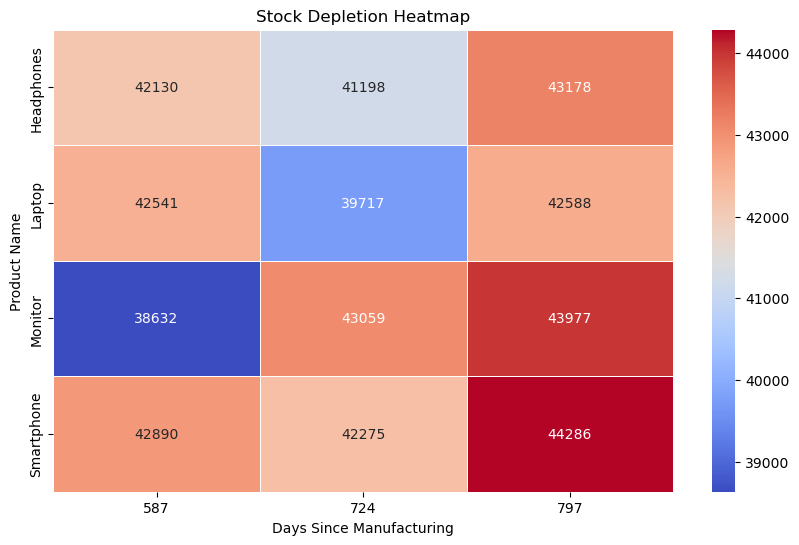

In [35]:
# Heatmap for Stock Depletion Trends**

sub_df["Manufacturing Date"] = pd.to_datetime(sub_df["Manufacturing Date"])

# Simulate stock depletion over time for visualization
df_stock_trend = sub_df.copy()
df_stock_trend["Days Since Manufacturing"] = (pd.Timestamp.today() - df_stock_trend["Manufacturing Date"]).dt.days
df_stock_trend = df_stock_trend.sort_values(by="Days Since Manufacturing")
stock_pivot = df_stock_trend.pivot_table(index="Product Name", 
                                         columns="Days Since Manufacturing", 
                                         values="Product Quantity", 
                                         aggfunc="sum")  # Sum to handle duplicates

# Plot the heatmap for stock depletion trends
plt.figure(figsize=(10, 6))
sns.heatmap(stock_pivot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

# Labels and title
plt.title("Stock Depletion Heatmap")
plt.xlabel("Days Since Manufacturing")
plt.ylabel("Product Name")

# Show plot
plt.show()


### Key Approach with Explanations:
- Create Pivot Table → df_stock_trend.pivot_table(...)
- Restructures the data to display "Product Name" as rows and "Days Since Manufacturing" as columns, summing "Product Quantity" to handle duplicates.
Initialize Figure → plt.figure(figsize=(10, 6))
- Sets the dimensions of the heatmap plot to 10x6 inches for better visibility. Generate Heatmap → sns.heatmap(...)
- Display Heatmap → plt.show()

# 📊 5. Project Summary: Analyzing Product Sales & Stock Trends

This project aimed to analyze product sales, stock trends, pricing impacts, and customer ratings to optimize business decisions. We focused on:

- Identifying best-selling and worst-selling products.
- Finding products with high stock but low sales.
- Understanding stock depletion trends over time.
- Analyzing the relationship between price and customer ratings.
- Evaluating revenue contributions by product category.

# 🔍 Key Findings & Insights
   
✅ Stock Depletion Trends (Heatmap)
- Laptops showed consistent stock depletion, indicating high demand.
- Smartphones had irregular depletion patterns, likely due to restocking events or supply chain delays.
- Some products had increasing stock, which suggests stock replenishments not being accounted for properly in the dataset.
   
✅ Product Pricing vs. Customer Ratings (Correlation & Boxplots)
- Higher-priced products tend to have lower ratings.
- Computing Devices had the best average ratings, while Audio Devices had the lowest ratings despite high prices.
- Customers may expect more from expensive products, leading to stricter reviews.

✅ Revenue by Product Category (Bar Chart)
- Mobile Devices contributed the highest revenue, followed by Display and Audio Devices.
- Computing Devices had the lowest revenue, despite good customer ratings.
- A deeper profitability analysis could reveal better insights.

✅ Products with High Stock but Low Sales (Bar Chart)
- Some products had large stock levels but low sales, requiring inventory clearance or promotional strategies.
- Smartphones and Monitors had the highest stock, indicating slower movement than expected.


# 📌 6. Future Work & Next Steps

Here are some ways this analysis can be extended using additional datasets and techniques:


📌 1. Sales Forecasting & Demand Prediction
- Use Time Series Forecasting (ARIMA, Prophet, or LSTMs) to predict future demand. Identify seasonal trends & peak sales periods.

📌 2. Stock Optimization & Supply Chain Analysis

- Integrate supplier & logistics data to optimize restocking. Analyze regional demand variations for better inventory planning.

📌 3. Sentiment Analysis on Customer Reviews
- Use Natural Language Processing (NLP) to extract insights from product reviews. Understand key pain points and product feature preferences.

📌 4. Dynamic Pricing Strategies
- Implement price elasticity models to see how price changes impact sales. Analyze discounting effects on customer buying behavior.

📌 5. Competitor Analysis & Market Trends
- Compare product performance with competitor offerings. Analyze global vs. regional sales patterns.

# 📚7. References & Useful Resources
Below are the resources and methodologies used in this project:

### 🔗 Dataset
- Global Product Inventory Dataset 2025: https://www.kaggle.com/datasets/keyushnisar/global-product-inventory-dataset-2025

### 🔗 Data Science & Analytics
- Pandas Documentation: https://pandas.pydata.org/docs/
- Seaborn for Visualizations: https://seaborn.pydata.org/
- Matplotlib Guide: https://matplotlib.org/stable/tutorials/

### 🔗 Sales & Inventory Management Concepts
- Pareto Principle in Business: https://www.investopedia.com/terms/1/80-20-rule.asp
- Demand Forecasting Techniques: https://towardsdatascience.com/demand-forecasting-methods

### 🔗 Machine Learning for Future Work

- Time Series Forecasting with ARIMA: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
- Sentiment Analysis for Product Reviews: https://www.analyticsvidhya.com/blog/2021/06/sentiment-analysis-using-python/